# Loading Dataset

In [179]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import keras_tuner as kt

In [181]:
def load_dataset(path):
    return pd.read_csv(path)

In [183]:
file_path='./NULBdata.csv'
df_stock = load_dataset(file_path)

In [185]:
df_stock

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,1,15/05/2024,675,682.9,660.1,660.1,-1.62,"15,761.00","1,06,01,118.70"
1,2,14/05/2024,655,674.9,655,671,3.07,"18,718.00","1,25,18,869.30"
2,3,13/05/2024,650,658,645,651,0.11,"5,463.00","35,48,046.70"
3,4,12/05/2024,670,670,650.3,650.3,-2.94,"6,884.00","45,11,826.40"
4,5,09/05/2024,683,689.6,662.6,670,-0.89,"14,540.00","97,68,167.80"
...,...,...,...,...,...,...,...,...,...
2471,2472,18/05/2011,230,230,230,230,0.00,22,"5,060.00"
2472,2473,16/05/2011,229,230,230,230,0.00,20,"4,600.00"
2473,2474,15/05/2011,225,229,229,229,0.00,57,"13,053.00"
2474,2475,12/05/2011,225,229,225,225,0.00,59,"13,427.00"


In [187]:
print("\nBasic statistics:")
print(df_stock.describe())


Basic statistics:
              S.N.     % Change
count  2476.000000  2476.000000
mean   1238.500000     0.020586
std     714.903956     1.666216
min       1.000000   -20.660000
25%     619.750000    -0.342500
50%    1238.500000     0.000000
75%    1857.250000     0.000000
max    2476.000000    10.000000


In [189]:
# Check for missing values
print("\nMissing values:")
print(df_stock.isnull().sum())


Missing values:
S.N.        0
Date        0
Open        0
High        0
Low         0
Ltp         0
% Change    0
Qty         0
Turnover    0
dtype: int64


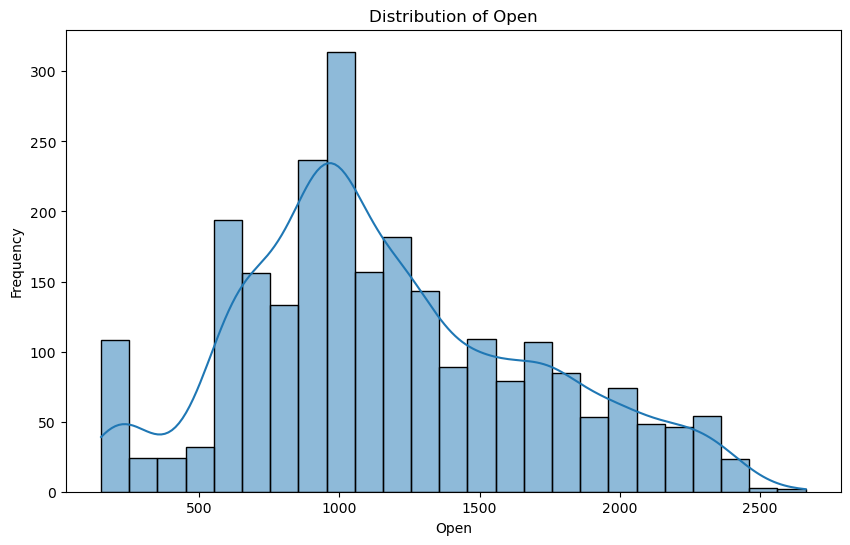

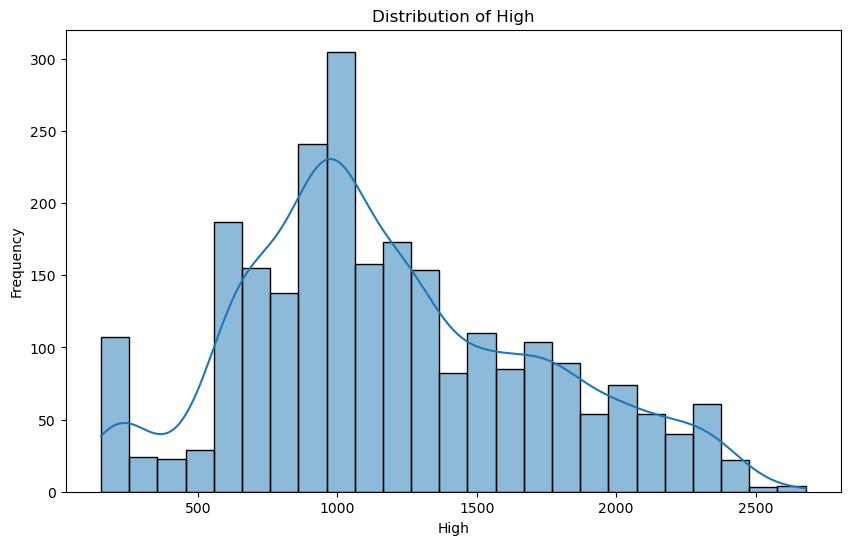

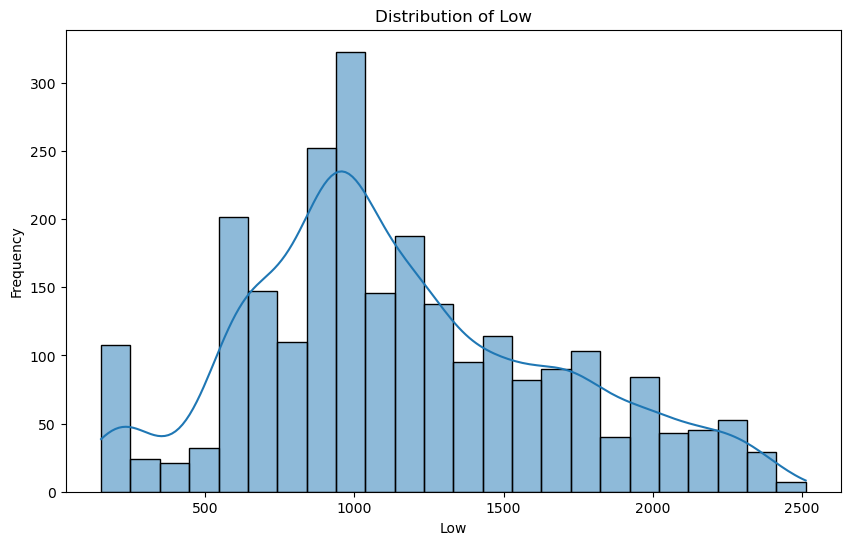

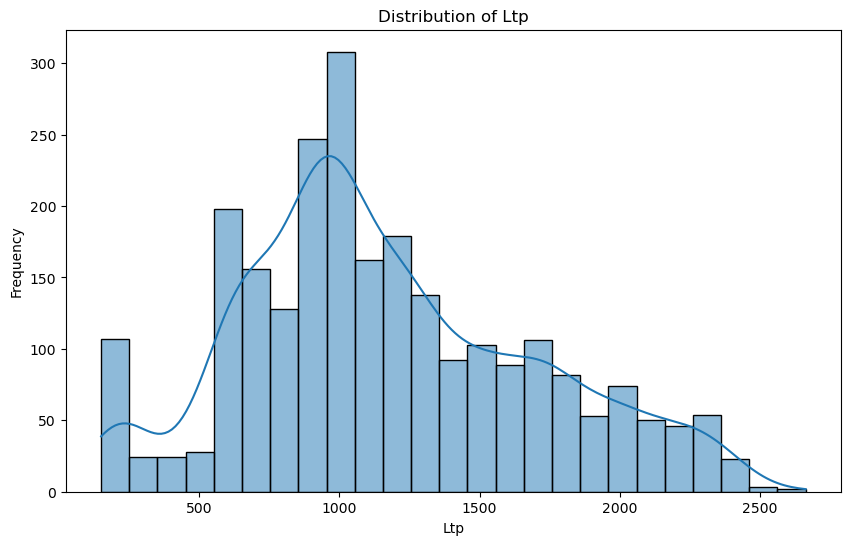

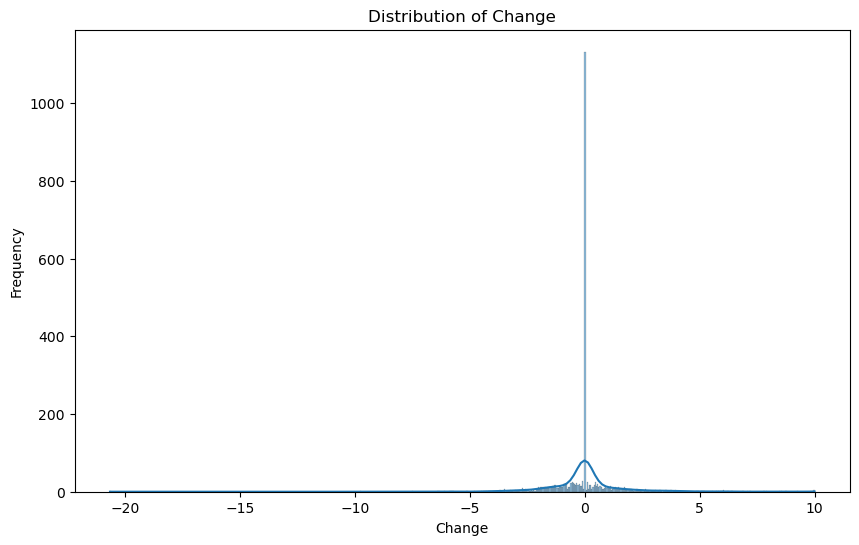

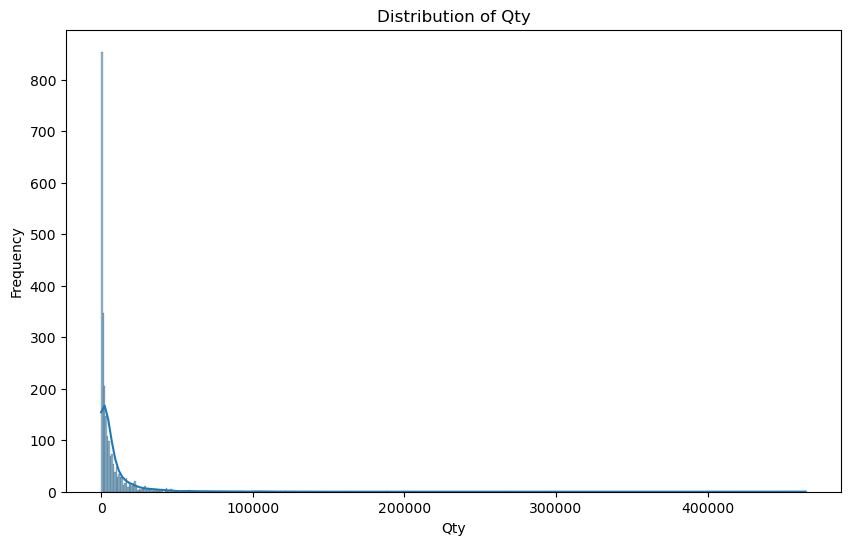

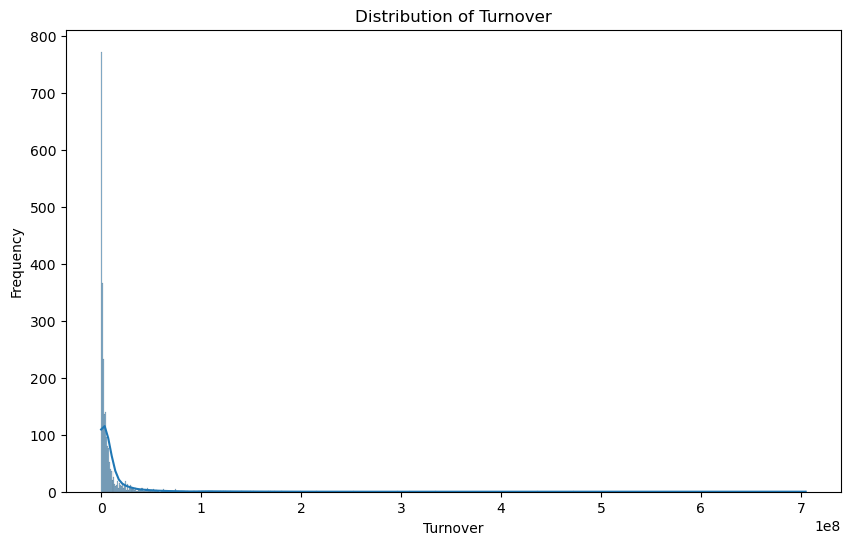

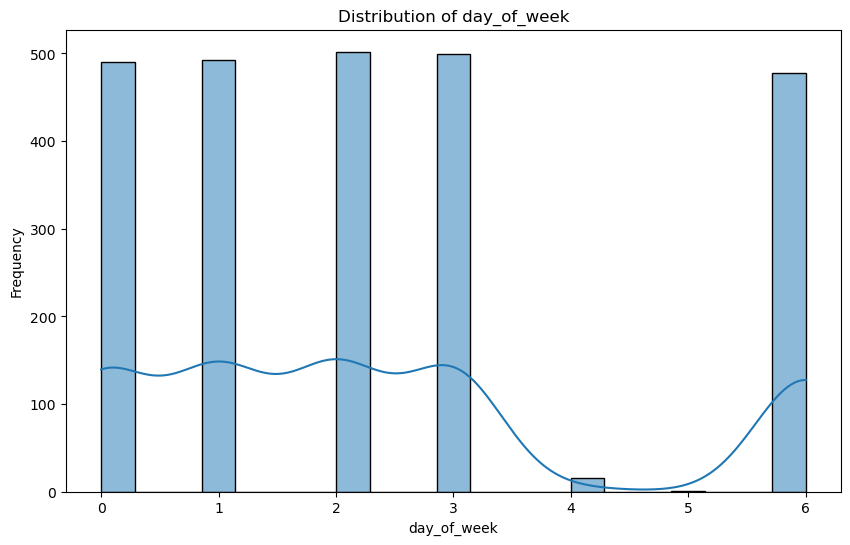

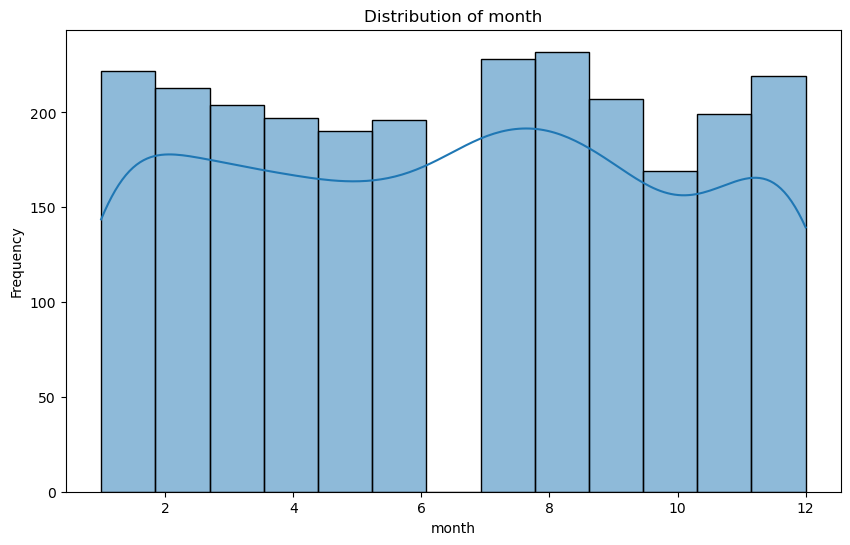

In [229]:
import seaborn as sns
# Visualize the data distribution
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in df_stock.columns:
    plot_distribution(df_stock, column)

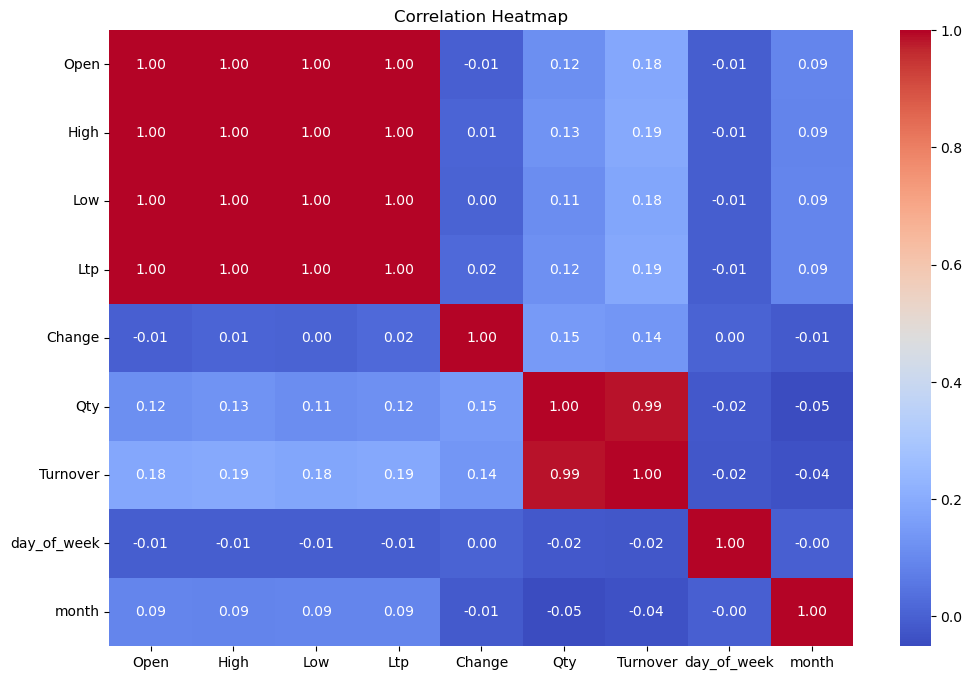

In [231]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_stock.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


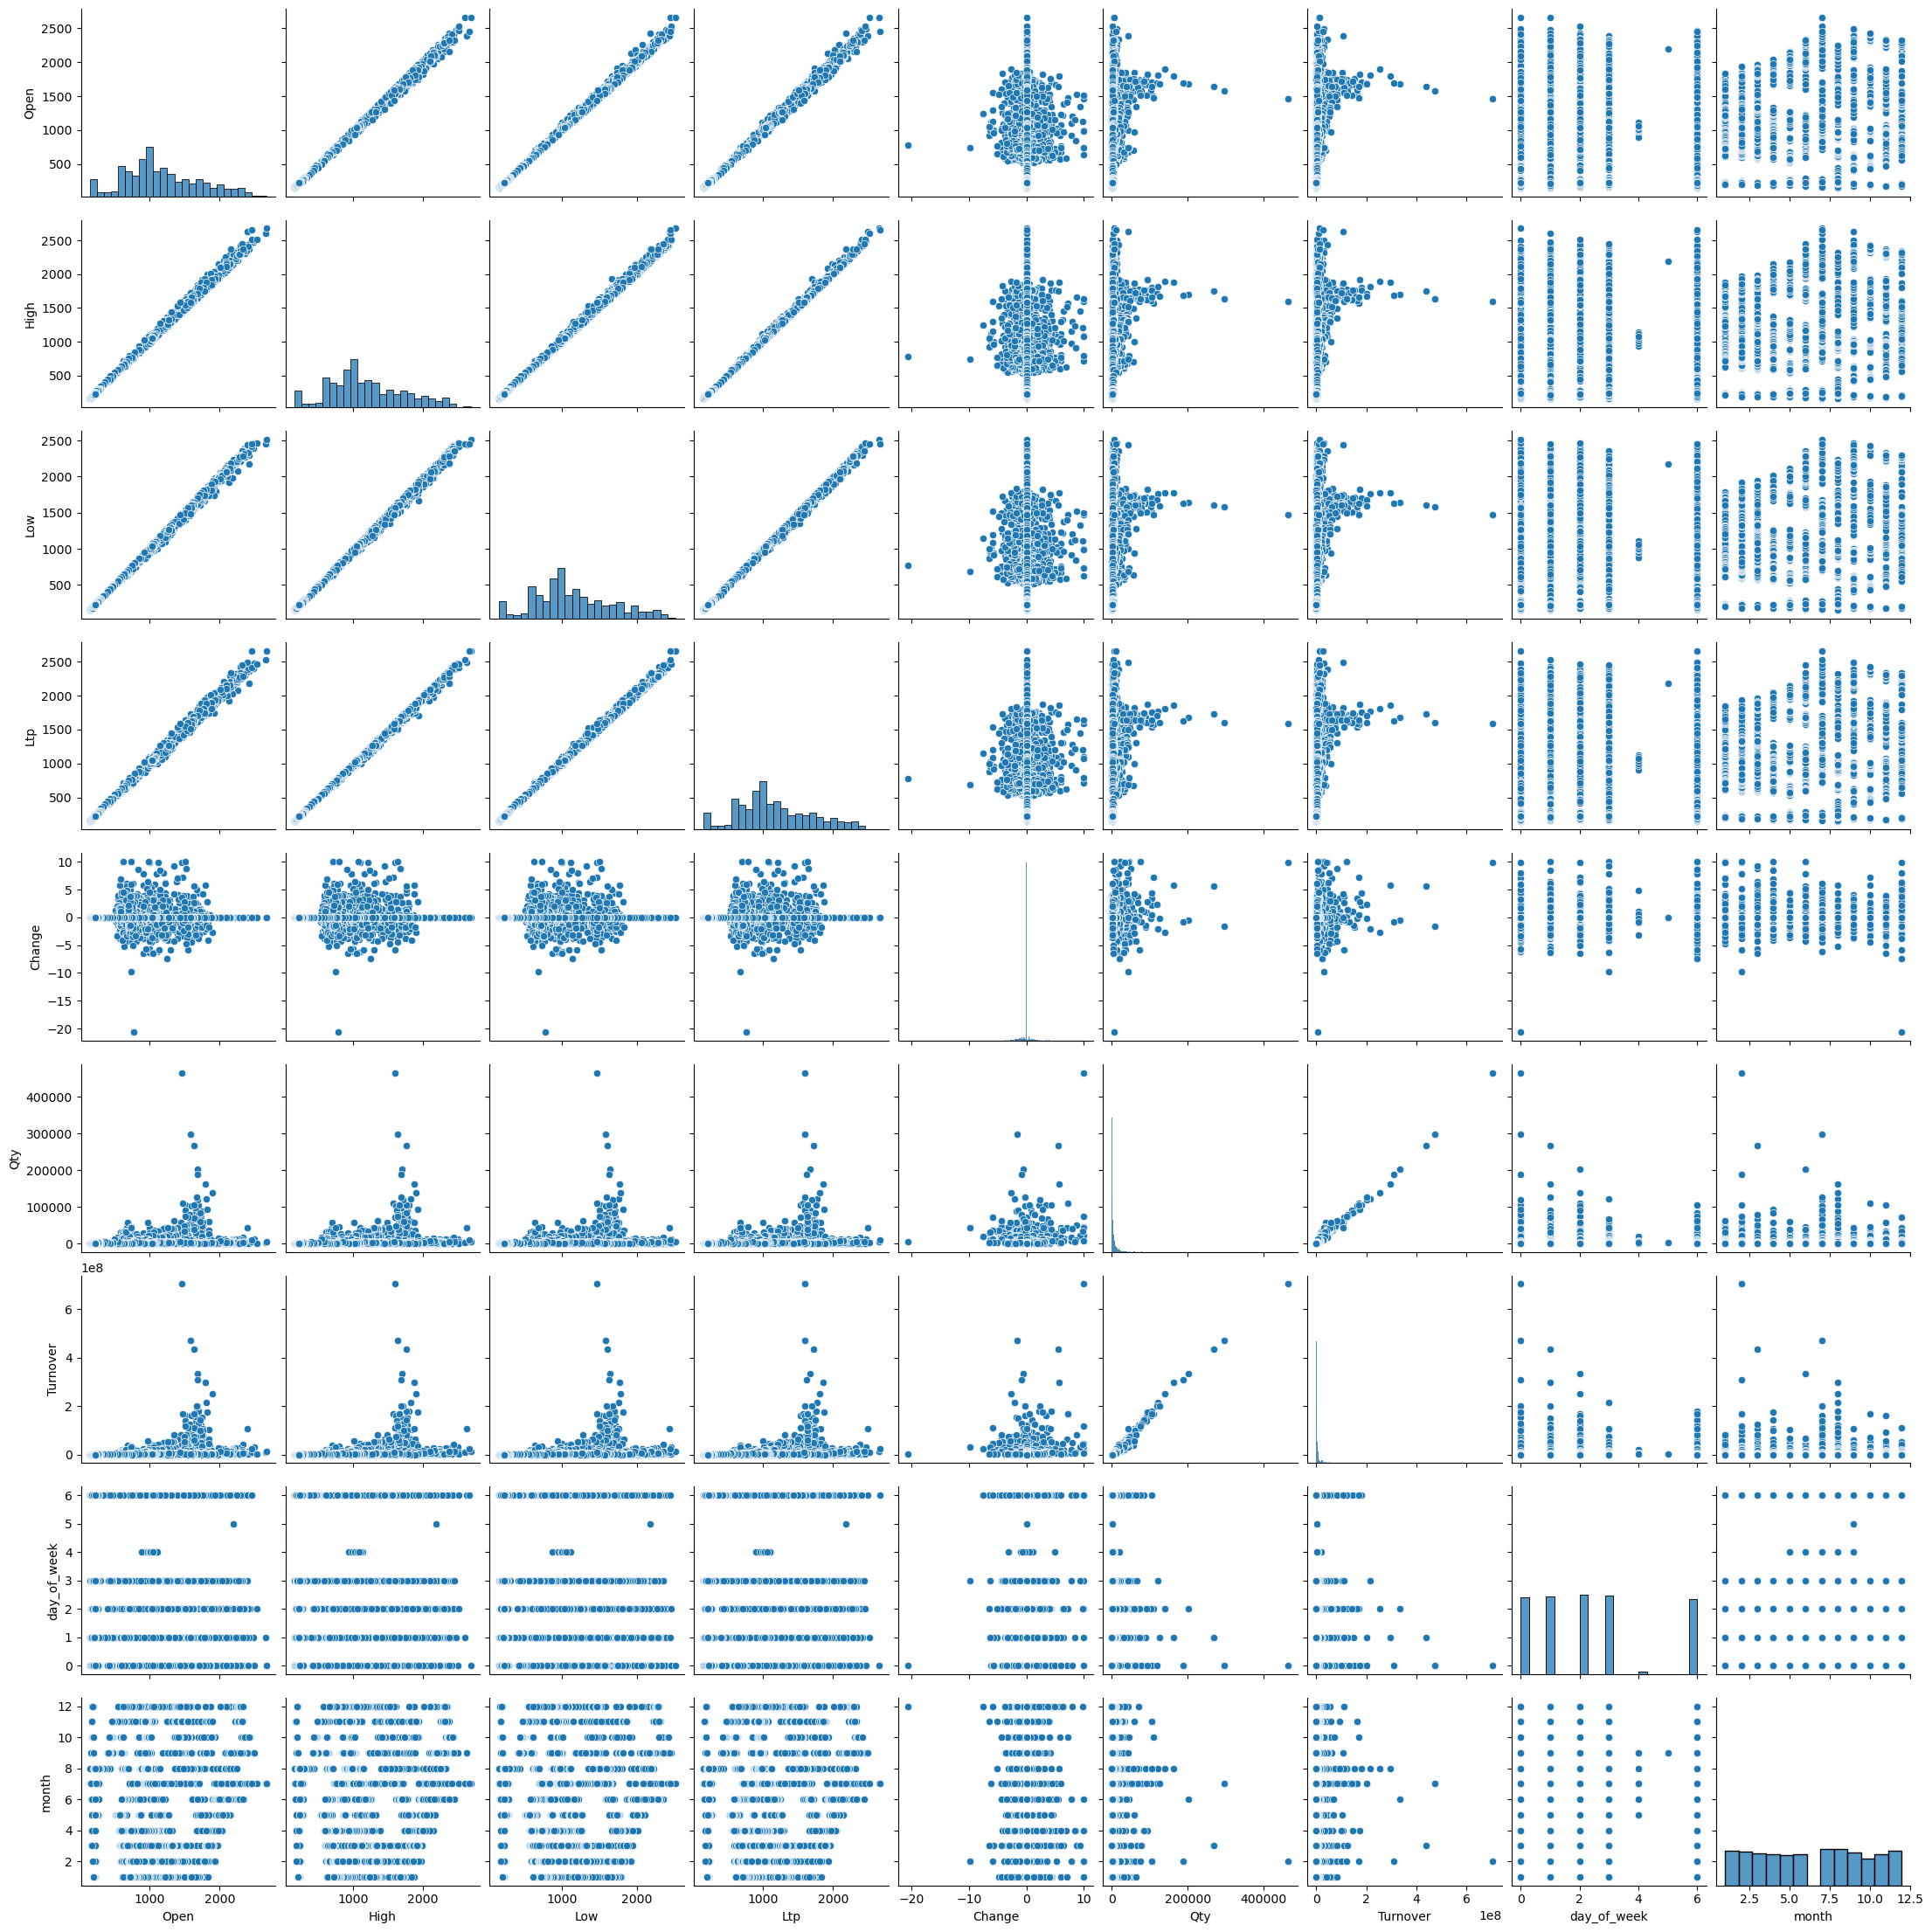

In [233]:
# Pairplot for the dataframe
sns.pairplot(df_stock)
plt.show()

In [201]:
df_stock=df_stock.rename(columns={'% Change':'Change'})

In [203]:
features = ['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']
df_stock = df_stock[features]

In [205]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    day, month, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


In [207]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

In [209]:
df_input = df_stock[['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']]


In [211]:
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data, min_val, max_val


In [213]:
columns_to_scale = ['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']
scaled_df = df_input.copy()

In [215]:
df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

# Extract additional temporal features
df_stock['day_of_week'] = df_stock['Date'].dt.dayofweek
df_stock['month'] = df_stock['Date'].dt.month


In [217]:
# Convert all necessary columns to strings first
df_stock['Open'] = df_stock['Open'].astype(str)
df_stock['High'] = df_stock['High'].astype(str)
df_stock['Low'] = df_stock['Low'].astype(str)
df_stock['Ltp'] = df_stock['Ltp'].astype(str)
df_stock['Qty'] = df_stock['Qty'].astype(str)
df_stock['Turnover'] = df_stock['Turnover'].astype(str)

# Remove commas from numeric columns and convert to float
df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)




In [219]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

In [221]:
features = ['Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover', 'day_of_week', 'month']
df_stock = df_stock[features]

In [223]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_stock), columns=features)
# df_scaled = df_stock.copy()
# df_scaled[['Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']] = scaler.fit_transform(df_stock[['Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']])


In [225]:
# def df_to_X_y(df, window_size=2):
#     df_as_np = df.to_numpy()
#     X = []
#     y = []
#     for i in range(len(df_as_np)-window_size):
#         row = [r for r in df_as_np[i:i+window_size]]
#         X.append(row)
#         label = df_as_np[i+window_size][4]  # Predicting 'Ltp'
#         y.append(label)
#     return np.array(X), np.array(y)

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        y.append(df_as_np[i+window_size][3])  # Predicting 'Ltp'
    return np.array(X), np.array(y)

In [227]:
WINDOW_SIZE = 5
X, y = df_to_X_y(df_scaled, WINDOW_SIZE)

In [38]:

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers



In [40]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
def variable_selection_network(inputs):
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(1, activation='sigmoid')(x)
    return x

In [46]:
def gated_residual_network(inputs, units):
    x = layers.Dense(units, activation='relu')(inputs)
    x = layers.Dense(inputs.shape[-1])(x)
    gate = layers.Dense(inputs.shape[-1], activation='sigmoid')(inputs)
    return x * gate + inputs

In [116]:

def build_tft_model(hp):
    inputs = keras.Input(shape=X.shape[1:])
    x = inputs

    for i in range(hp.Int('num_transformer_blocks', min_value=2, max_value=8, step=2)):
        x = transformer_encoder(x, hp.Int('head_size', min_value=8, max_value=256, step=32), hp.Int('num_heads', min_value=2, max_value=16), hp.Int('ff_dim', min_value=4, max_value=64), hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.6))

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    for i in range(hp.Int('num_mlp_layers', min_value=1, max_value=3)):
        x = layers.Dense(hp.Int(f'mlp_units_{i}', min_value=32, max_value=256, step=32))(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(hp.Float(f'mlp_dropout_{i}', min_value=0.1, max_value=0.6))(x)

    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)

    optimizer = hp.Choice('optimizer', values=['adam', 'adamax'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = Adamax(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)

    model.compile(optimizer=opt, loss=MeanSquaredError(), metrics=['mae', RootMeanSquaredError()])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras import layers
from tensorflow import keras

In [93]:
# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_tft_model,
    objective='val_loss',
    max_trials=10,
    directory='./tft_tuning',
    project_name='tft_project'
)   

Reloading Tuner from ./tft_tuning/tft_project/tuner0.json


In [95]:
# Nested Cross-Validation
import numpy as np
from sklearn.model_selection import KFold
import keras_tuner as kt

best_model_hyperparameters = None
best_model_mae = float('inf')
worst_model_hyperparameters = None
worst_model_mae = float('-inf')

In [97]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the tuner
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

In [99]:
nested_scores = []
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [101]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

# Build the model with the optimal hyperparameters
model = build_tft_model(best_hps)



In [104]:
from tensorflow.keras.optimizers import Adam, Adamax

In [106]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
# Define a function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [118]:
# Define a function to plot training and validation MAE
def plot_mae(history):
    plt.figure(figsize=(10, 6))
    if 'mean_absolute_error' in history.history and 'val_mean_absolute_error' in history.history:
        plt.plot(history.history['mean_absolute_error'], label='Training MAE')
        plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
        plt.title('Training and Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()
        plt.show()
    else:
        print("MAE metric not found in history.")


In [120]:
# Define a function to plot training and validation MSE
def plot_mse(history):
    plt.figure(figsize=(10, 6))
    if 'mean_squared_error' in history.history and 'val_mean_squared_error' in history.history:
        plt.plot(history.history['mean_squared_error'], label='Training MSE')
        plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
        plt.title('Training and Validation MSE')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    else:
        print("MSE metric not found in history.")

Reloading Tuner from ./keras_tuner_random_dir_fold_tf_0_0/hyperparameter_random_tuning_fold_tf_0_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x346ced090>


Epoch 1/5
31/31 [==============================] - 5s 56ms/step - loss: 0.0716 - mean_absolute_error: 0.1975 - mean_squared_error: 0.0716 - val_loss: 0.0290 - val_mean_absolute_error: 0.1527 - val_mean_squared_error: 0.0290
Epoch 2/5
31/31 [==============================] - 1s 46ms/step - loss: 0.0279 - mean_absolute_error: 0.1311 - mean_squared_error: 0.0279 - val_loss: 0.0255 - val_mean_absolute_error: 0.1468 - val_mean_squared_error: 0.0255
Epoch 3/5
31/31 [==============================] - 1s 49ms/step - loss: 0.0246 - mean_absolute_error: 0.1234 - mean_squared_error: 0.0246 - val_loss: 0.0080 - val_mean_absolute_error: 0.0734 - val_mean_squared_error: 0.0080
Epoch 4/5
31/31 [==============================] - 1s 46ms/step - loss: 0.0170 - mean_absolute_error: 0.1011 - mean_squared_error: 0.0170 - val_loss: 0.0092 - val_mean_absolute_error: 0.0885 - val_mean_squared_error: 0.0092
Epoch 5/5
31/31 [==============================] - 2s 55ms/step - loss: 0.0150 - mean_absolute_error: 0.

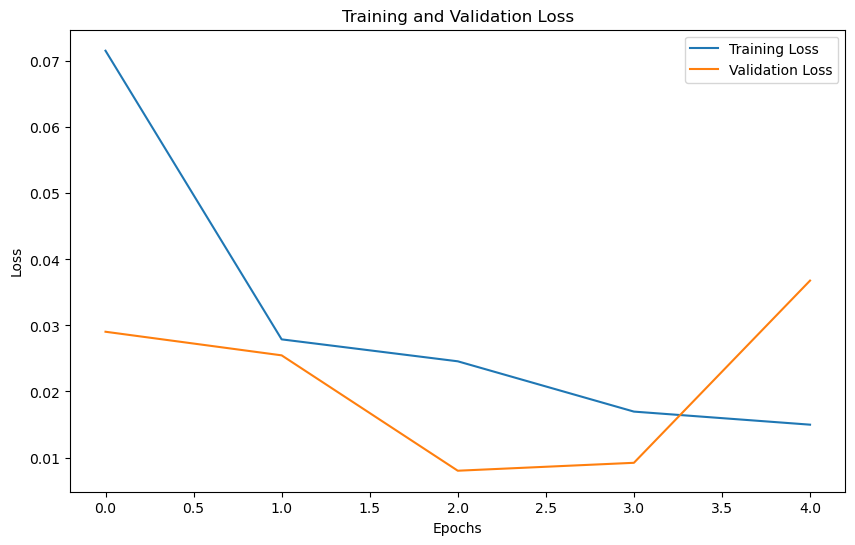

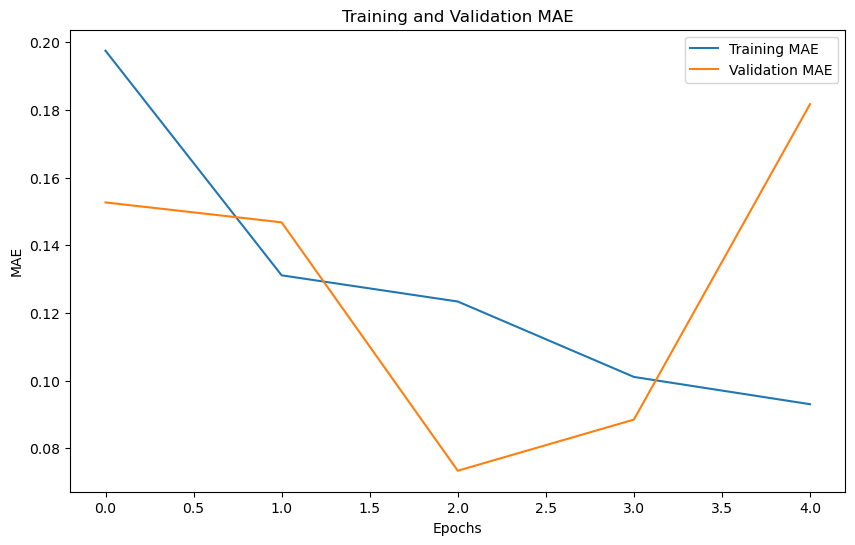

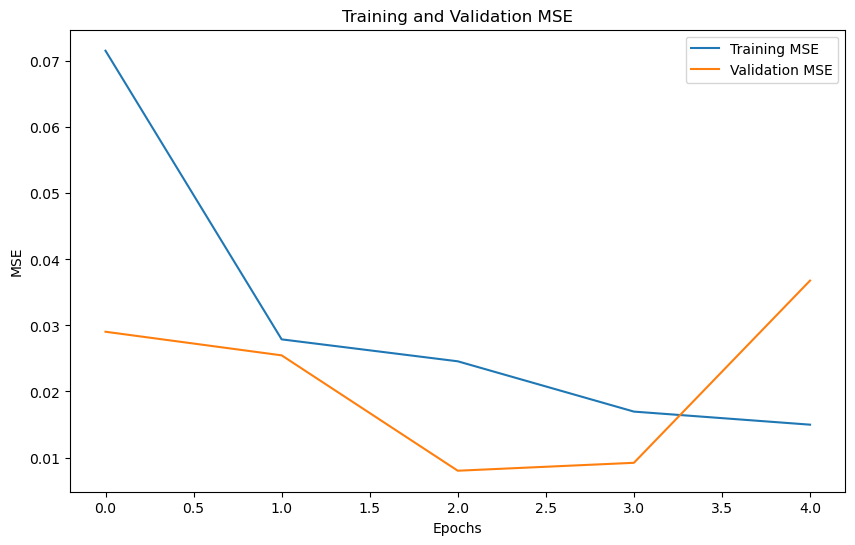

31/31 [==============================] - 1s 11ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_0_1/hyperparameter_random_tuning_fold_tf_0_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x3019c5b90>


Epoch 1/5
31/31 [==============================] - 5s 55ms/step - loss: 0.1027 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1027 - val_loss: 0.0182 - val_mean_absolute_error: 0.1041 - val_mean_squared_error: 0.0182
Epoch 2/5
31/31 [==============================] - 1s 47ms/step - loss: 0.0363 - mean_absolute_error: 0.1484 - mean_squared_error: 0.0363 - val_loss: 0.0385 - val_mean_absolute_error: 0.1733 - val_mean_squared_error: 0.0385
Epoch 3/5
31/31 [==============================] - 1s 47ms/step - loss: 0.0259 - mean_absolute_error: 0.1216 - mean_squared_error: 0.0259 - val_loss: 0.0056 - val_mean_absolute_error: 0.0631 - val_mean_squared_error: 0.0056
Epoch 4/5
31/31 [==============================] - 1s 48ms/step - loss: 0.0167 - mean_absolute_error: 0.1015 - mean_squared_error: 0.0167 - val_loss: 0.0060 - val_mean_absolute_error: 0.0633 - val_mean_squared_error: 0.0060
Epoch 5/5
31/31 [==============================] - 1s 46ms/step - loss: 0.0149 - mean_absolute_error: 0.

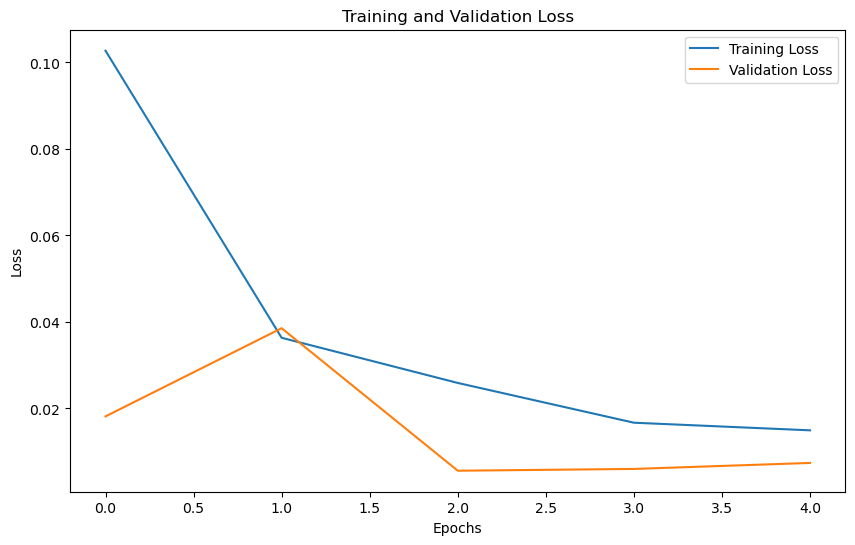

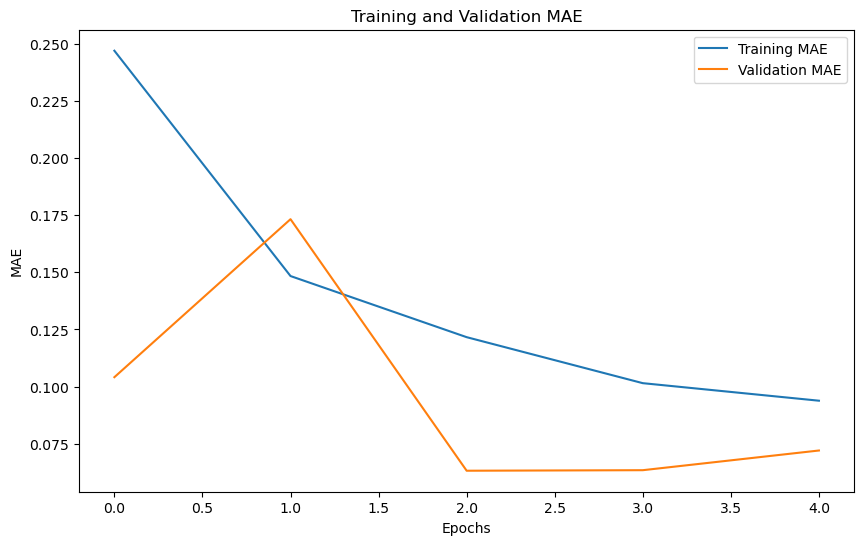

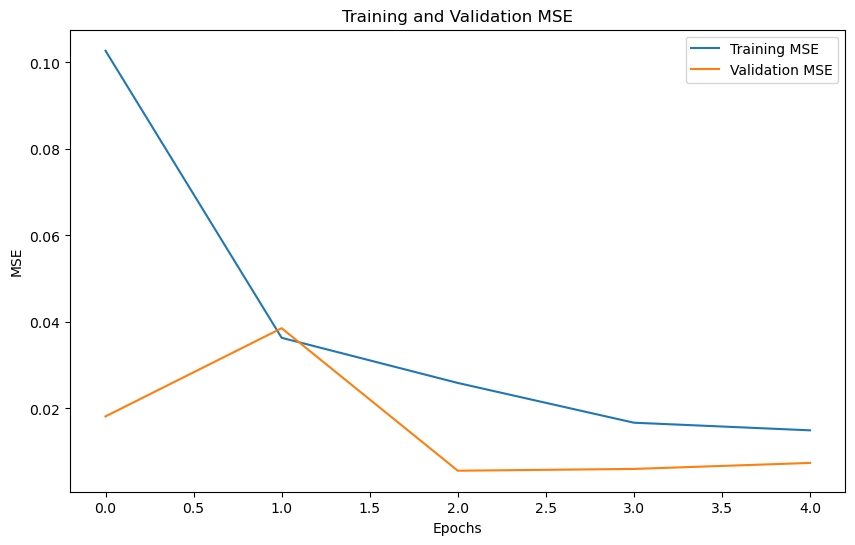

16/16 [==============================] - 0s 10ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_1_0/hyperparameter_random_tuning_fold_tf_1_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x31015e250>


Epoch 1/5
31/31 [==============================] - 4s 37ms/step - loss: 0.5341 - mean_absolute_error: 0.4278 - mean_squared_error: 0.5341 - val_loss: 0.1325 - val_mean_absolute_error: 0.3101 - val_mean_squared_error: 0.1325
Epoch 2/5
31/31 [==============================] - 1s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.1659 - mean_squared_error: 0.0457 - val_loss: 0.0420 - val_mean_absolute_error: 0.1730 - val_mean_squared_error: 0.0420
Epoch 3/5
31/31 [==============================] - 1s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0996 - mean_squared_error: 0.0170 - val_loss: 0.0346 - val_mean_absolute_error: 0.1559 - val_mean_squared_error: 0.0346
Epoch 4/5
31/31 [==============================] - 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0948 - mean_squared_error: 0.0166 - val_loss: 0.0370 - val_mean_absolute_error: 0.1723 - val_mean_squared_error: 0.0370
Epoch 5/5
31/31 [==============================] - 1s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.

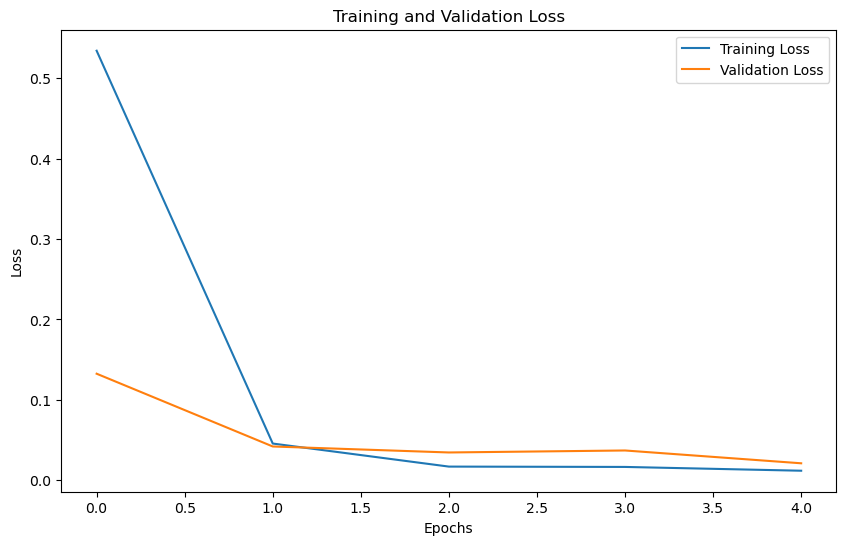

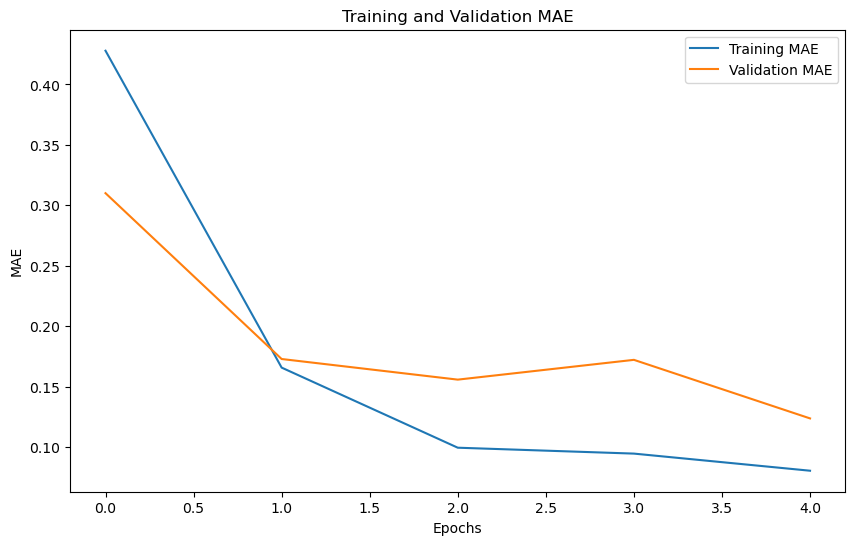

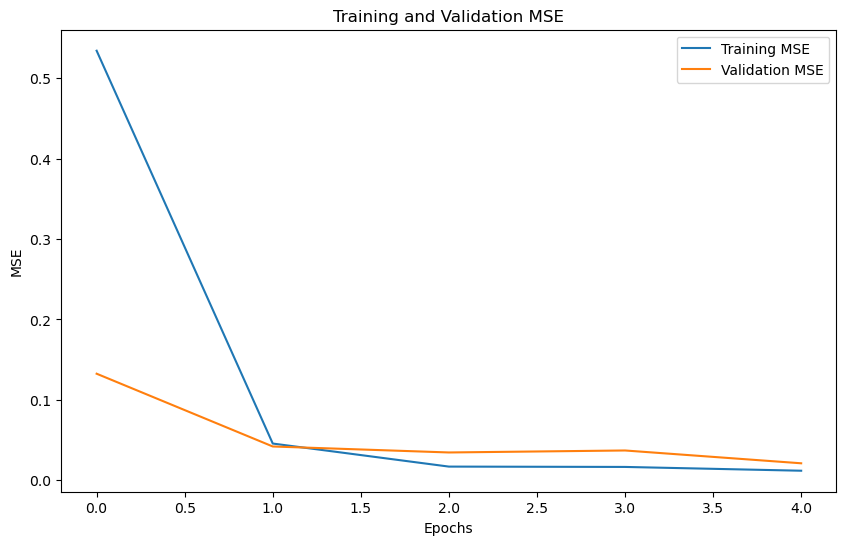

31/31 [==============================] - 0s 6ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_1_1/hyperparameter_random_tuning_fold_tf_1_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x31648e310>


Epoch 1/5
31/31 [==============================] - 5s 20ms/step - loss: 0.0621 - mean_absolute_error: 0.1861 - mean_squared_error: 0.0621 - val_loss: 0.0169 - val_mean_absolute_error: 0.1110 - val_mean_squared_error: 0.0169
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0957 - mean_squared_error: 0.0154 - val_loss: 0.0038 - val_mean_absolute_error: 0.0519 - val_mean_squared_error: 0.0038
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0784 - mean_squared_error: 0.0104 - val_loss: 0.0050 - val_mean_absolute_error: 0.0590 - val_mean_squared_error: 0.0050
Epoch 4/5
31/31 [==============================] - 0s 9ms/step - loss: 0.0086 - mean_absolute_error: 0.0692 - mean_squared_error: 0.0086 - val_loss: 0.0016 - val_mean_absolute_error: 0.0314 - val_mean_squared_error: 0.0016
Epoch 5/5
31/31 [==============================] - 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0611

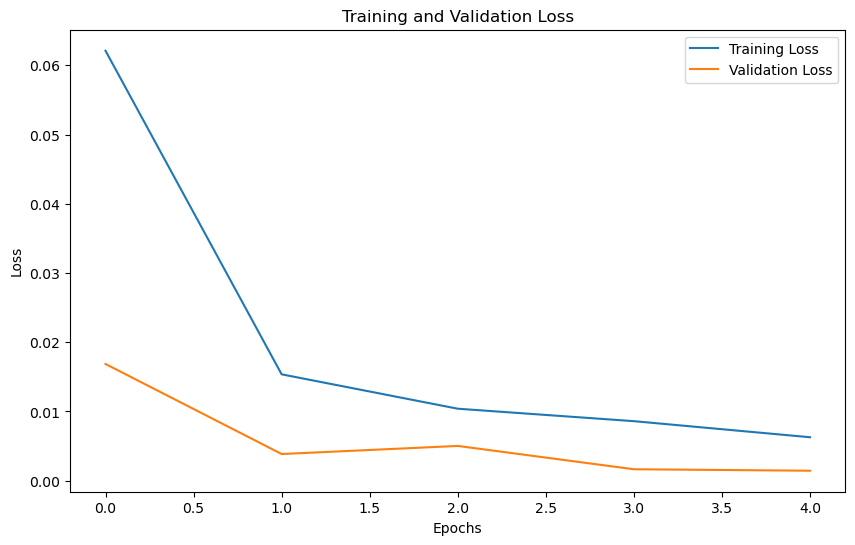

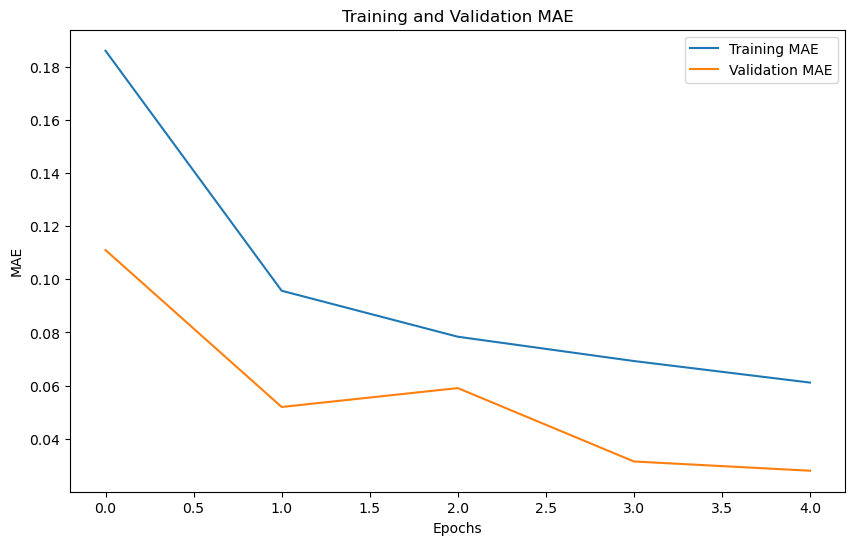

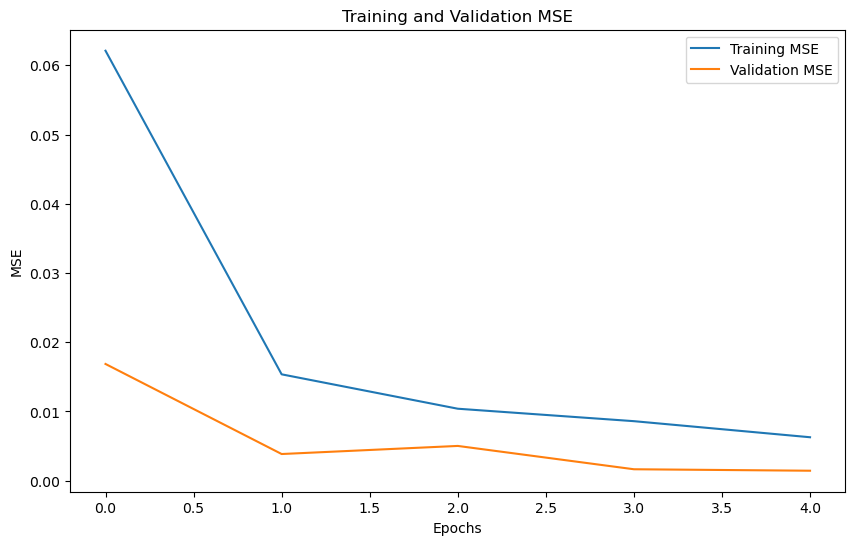

16/16 [==============================] - 0s 11ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_2_0/hyperparameter_random_tuning_fold_tf_2_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x3522a1d10>


Epoch 1/5
31/31 [==============================] - 8s 33ms/step - loss: 0.0844 - mean_absolute_error: 0.1945 - mean_squared_error: 0.0844 - val_loss: 0.0441 - val_mean_absolute_error: 0.1840 - val_mean_squared_error: 0.0441
Epoch 2/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.1187 - mean_squared_error: 0.0240 - val_loss: 0.0050 - val_mean_absolute_error: 0.0572 - val_mean_squared_error: 0.0050
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0789 - mean_squared_error: 0.0112 - val_loss: 0.0054 - val_mean_absolute_error: 0.0643 - val_mean_squared_error: 0.0054
Epoch 4/5
31/31 [==============================] - 1s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0098 - val_loss: 0.0034 - val_mean_absolute_error: 0.0484 - val_mean_squared_error: 0.0034
Epoch 5/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0098 - mean_absolute_error: 0.

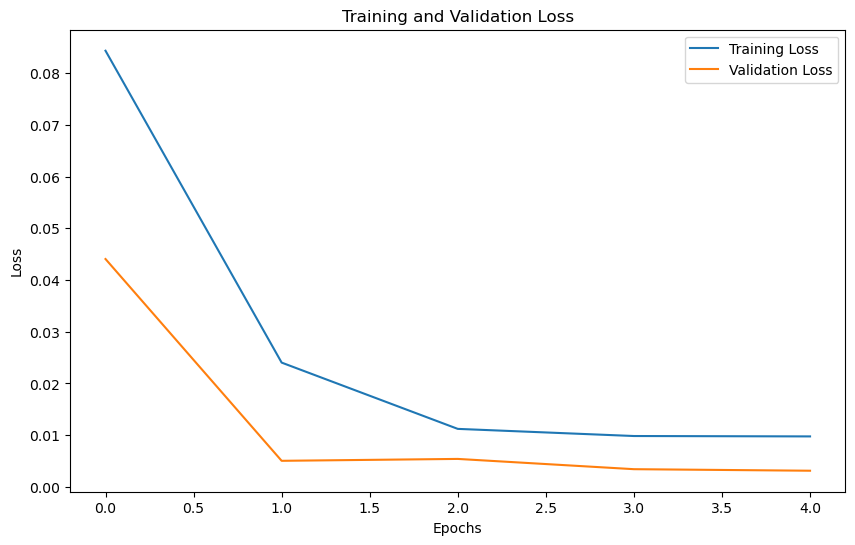

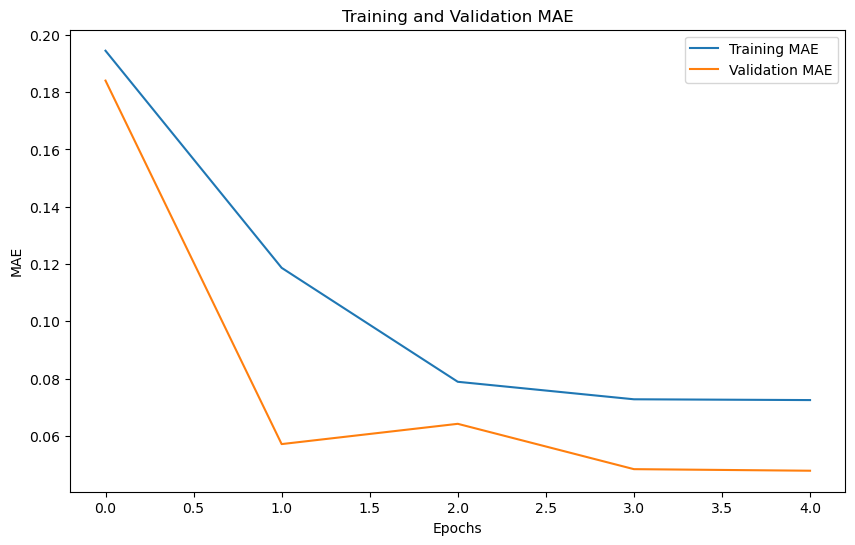

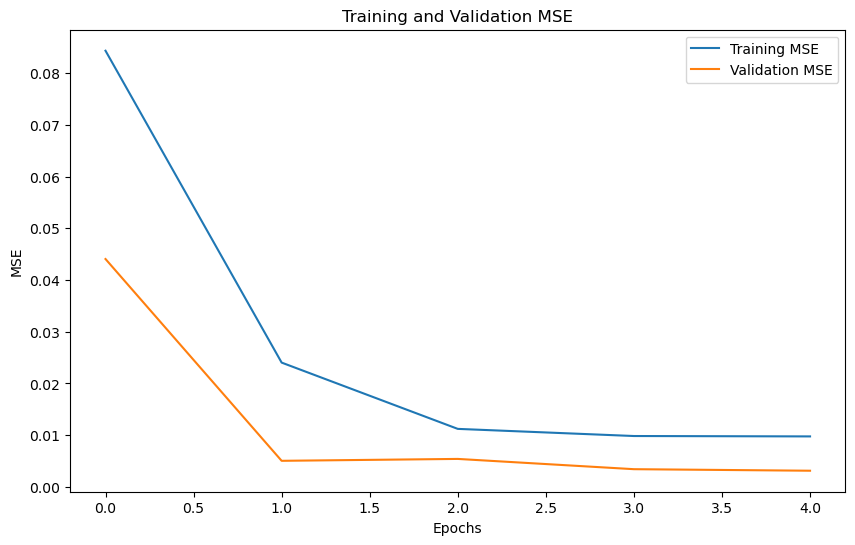

31/31 [==============================] - 1s 4ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_2_1/hyperparameter_random_tuning_fold_tf_2_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x312515f90>


Epoch 1/5
31/31 [==============================] - 4s 19ms/step - loss: 0.1214 - mean_absolute_error: 0.2841 - mean_squared_error: 0.1214 - val_loss: 0.0156 - val_mean_absolute_error: 0.0934 - val_mean_squared_error: 0.0156
Epoch 2/5
31/31 [==============================] - 0s 9ms/step - loss: 0.0363 - mean_absolute_error: 0.1498 - mean_squared_error: 0.0363 - val_loss: 0.0046 - val_mean_absolute_error: 0.0534 - val_mean_squared_error: 0.0046
Epoch 3/5
31/31 [==============================] - 0s 9ms/step - loss: 0.0229 - mean_absolute_error: 0.1170 - mean_squared_error: 0.0229 - val_loss: 0.0055 - val_mean_absolute_error: 0.0620 - val_mean_squared_error: 0.0055
Epoch 4/5
31/31 [==============================] - 0s 11ms/step - loss: 0.0209 - mean_absolute_error: 0.1118 - mean_squared_error: 0.0209 - val_loss: 0.0038 - val_mean_absolute_error: 0.0496 - val_mean_squared_error: 0.0038
Epoch 5/5
31/31 [==============================] - 0s 11ms/step - loss: 0.0166 - mean_absolute_error: 0.09

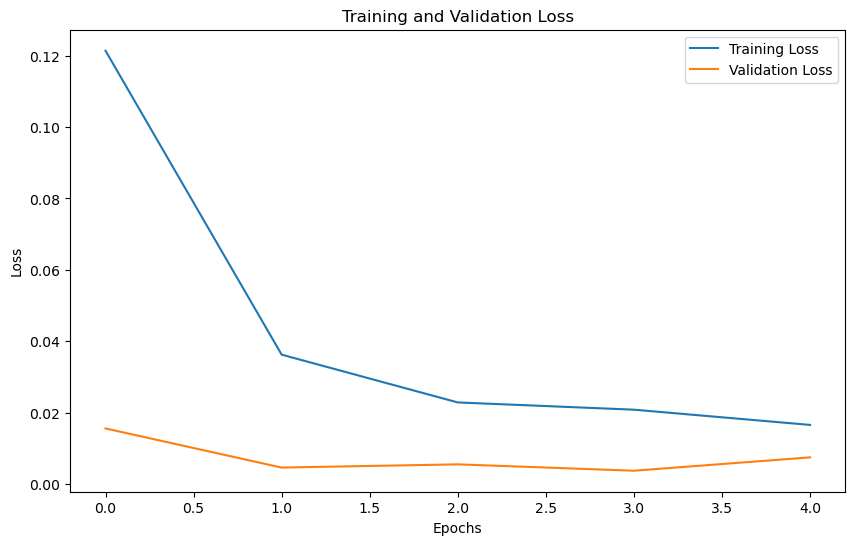

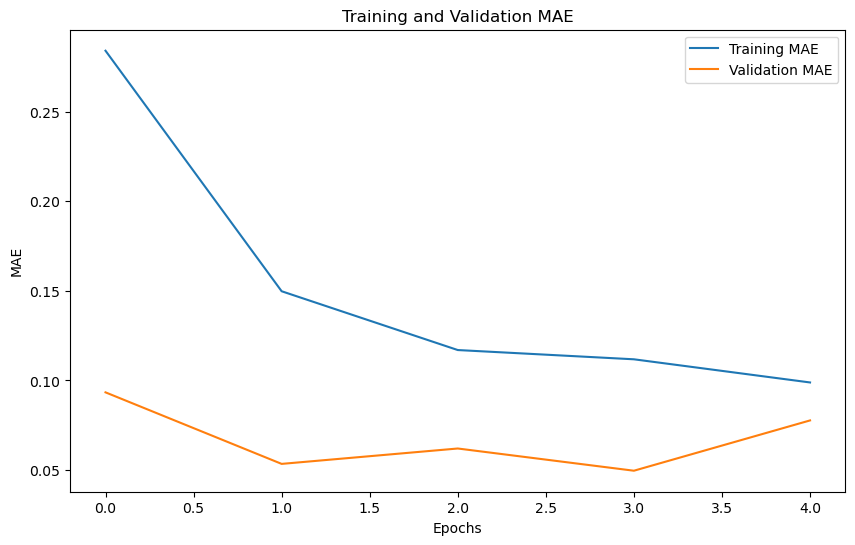

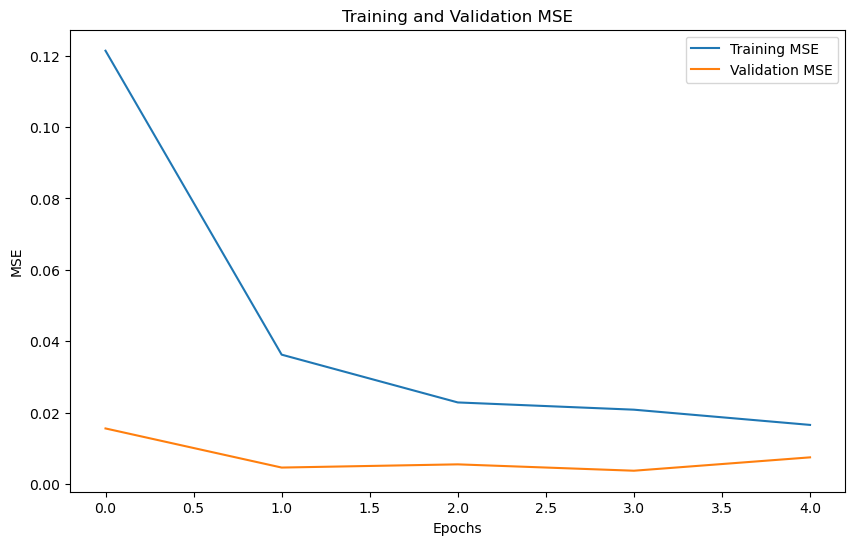

16/16 [==============================] - 0s 10ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_3_0/hyperparameter_random_tuning_fold_tf_3_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x39024bed0>


Epoch 1/5
31/31 [==============================] - 4s 25ms/step - loss: 0.1635 - mean_absolute_error: 0.3362 - mean_squared_error: 0.1635 - val_loss: 0.1424 - val_mean_absolute_error: 0.3217 - val_mean_squared_error: 0.1424
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0856 - mean_absolute_error: 0.2285 - mean_squared_error: 0.0856 - val_loss: 0.0972 - val_mean_absolute_error: 0.2530 - val_mean_squared_error: 0.0972
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0567 - mean_absolute_error: 0.1808 - mean_squared_error: 0.0567 - val_loss: 0.0337 - val_mean_absolute_error: 0.1538 - val_mean_squared_error: 0.0337
Epoch 4/5
31/31 [==============================] - 1s 19ms/step - loss: 0.0368 - mean_absolute_error: 0.1443 - mean_squared_error: 0.0368 - val_loss: 0.0138 - val_mean_absolute_error: 0.1066 - val_mean_squared_error: 0.0138
Epoch 5/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0271 - mean_absolute_error: 0.

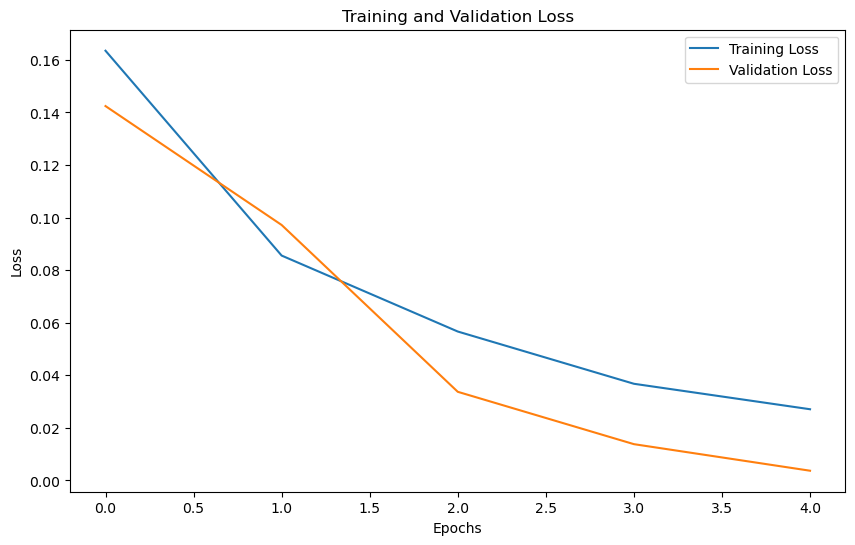

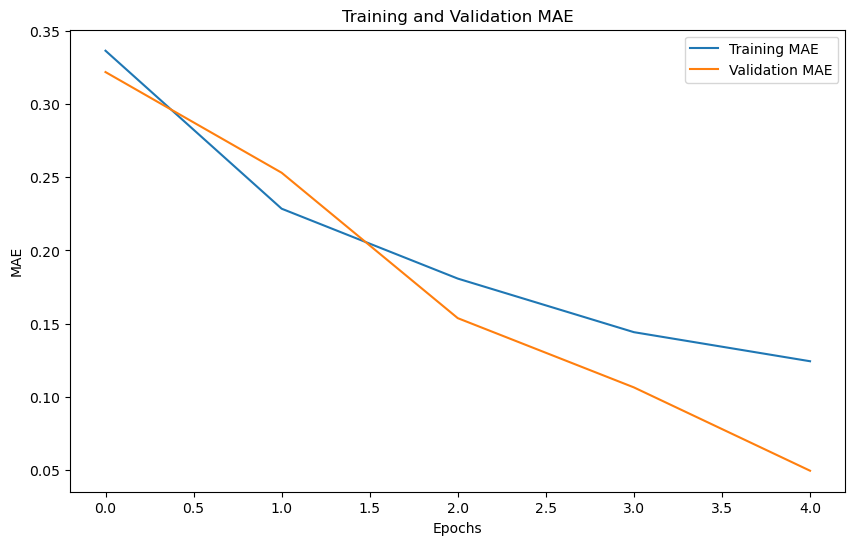

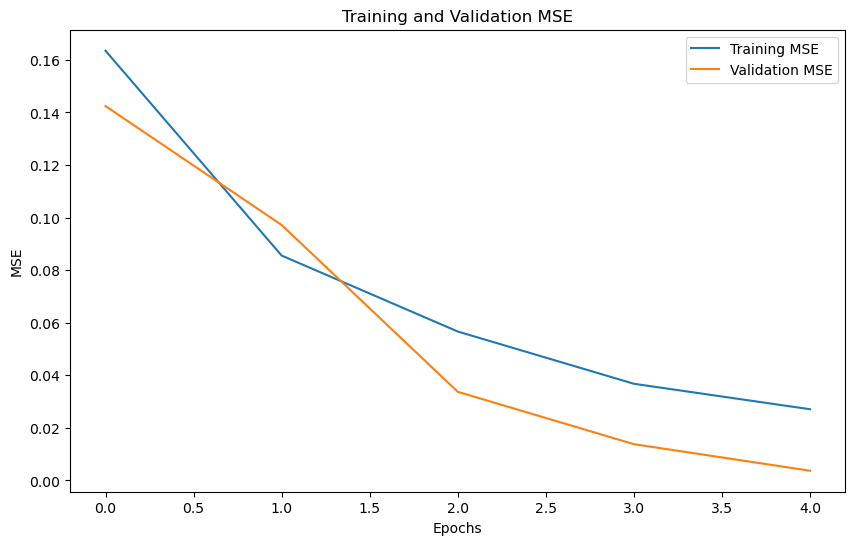

31/31 [==============================] - 0s 4ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_3_1/hyperparameter_random_tuning_fold_tf_3_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x391d19610>


Epoch 1/5
31/31 [==============================] - 2s 22ms/step - loss: 0.2021 - mean_absolute_error: 0.3243 - mean_squared_error: 0.2021 - val_loss: 0.0704 - val_mean_absolute_error: 0.2040 - val_mean_squared_error: 0.0704
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.1525 - mean_squared_error: 0.0421 - val_loss: 0.0038 - val_mean_absolute_error: 0.0473 - val_mean_squared_error: 0.0038
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0933 - mean_squared_error: 0.0159 - val_loss: 0.0026 - val_mean_absolute_error: 0.0369 - val_mean_squared_error: 0.0026
Epoch 4/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0770 - mean_squared_error: 0.0104 - val_loss: 0.0120 - val_mean_absolute_error: 0.0920 - val_mean_squared_error: 0.0120
Epoch 5/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.

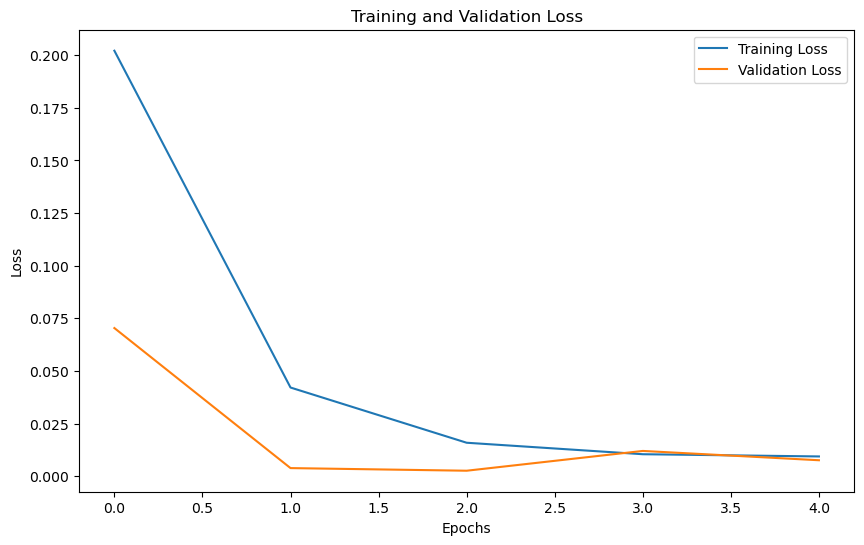

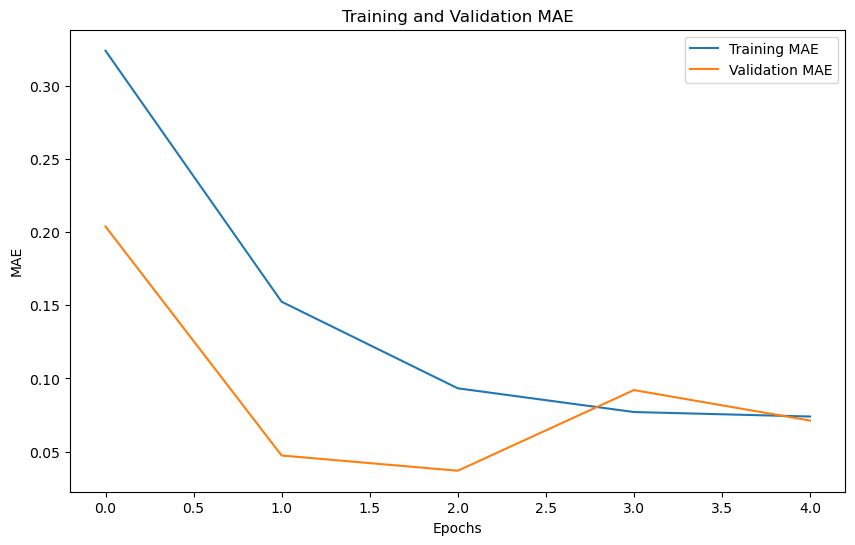

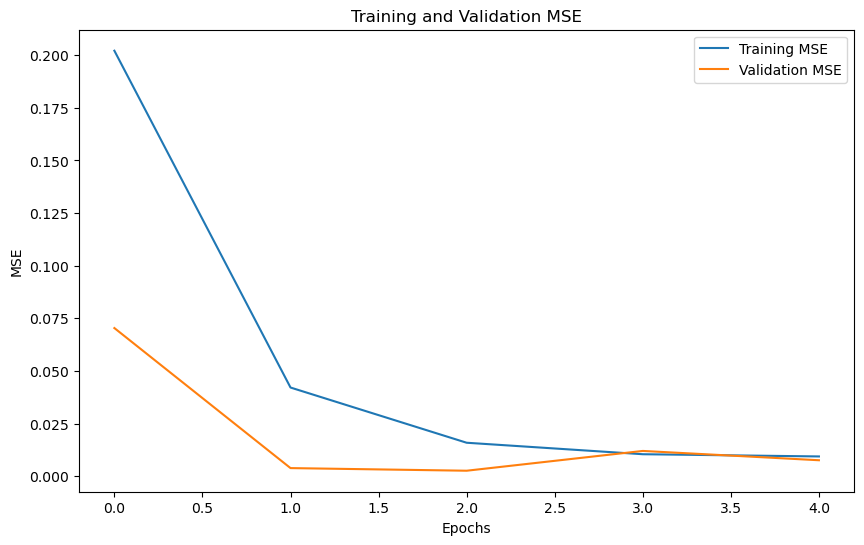

16/16 [==============================] - 0s 11ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_4_0/hyperparameter_random_tuning_fold_tf_4_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x3902243d0>


Epoch 1/5
31/31 [==============================] - 8s 72ms/step - loss: 0.5352 - mean_absolute_error: 0.4921 - mean_squared_error: 0.5352 - val_loss: 0.1296 - val_mean_absolute_error: 0.3107 - val_mean_squared_error: 0.1296
Epoch 2/5
31/31 [==============================] - 2s 58ms/step - loss: 0.0858 - mean_absolute_error: 0.2289 - mean_squared_error: 0.0858 - val_loss: 0.0374 - val_mean_absolute_error: 0.1695 - val_mean_squared_error: 0.0374
Epoch 3/5
31/31 [==============================] - 2s 59ms/step - loss: 0.0522 - mean_absolute_error: 0.1773 - mean_squared_error: 0.0522 - val_loss: 0.0077 - val_mean_absolute_error: 0.0667 - val_mean_squared_error: 0.0077
Epoch 4/5
31/31 [==============================] - 2s 61ms/step - loss: 0.0391 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0391 - val_loss: 0.0182 - val_mean_absolute_error: 0.1182 - val_mean_squared_error: 0.0182
Epoch 5/5
31/31 [==============================] - 2s 63ms/step - loss: 0.0269 - mean_absolute_error: 0.

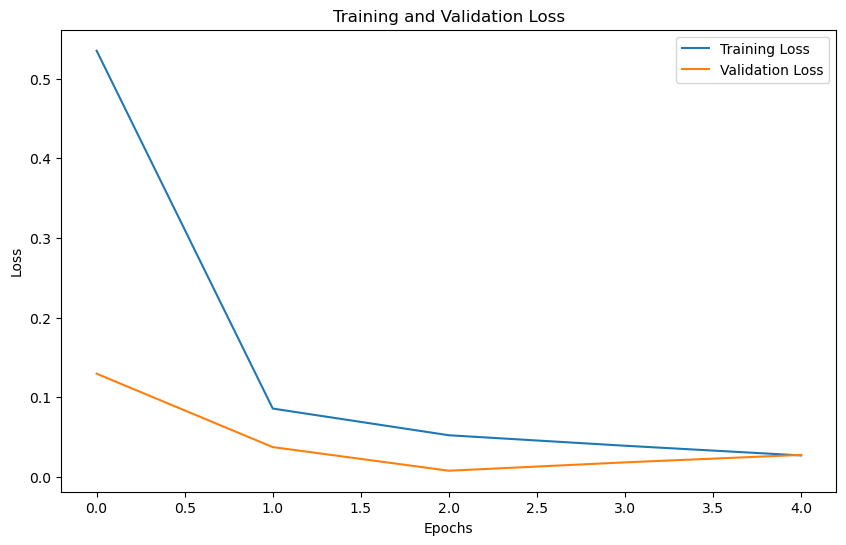

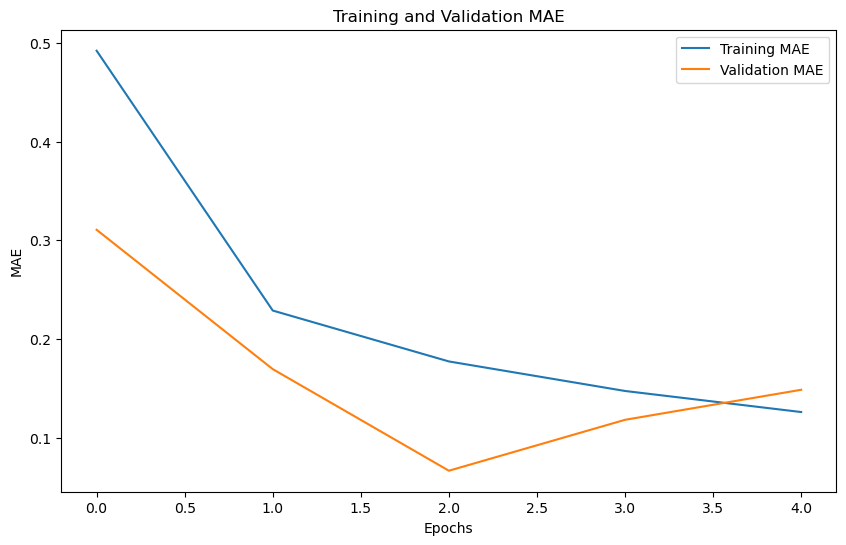

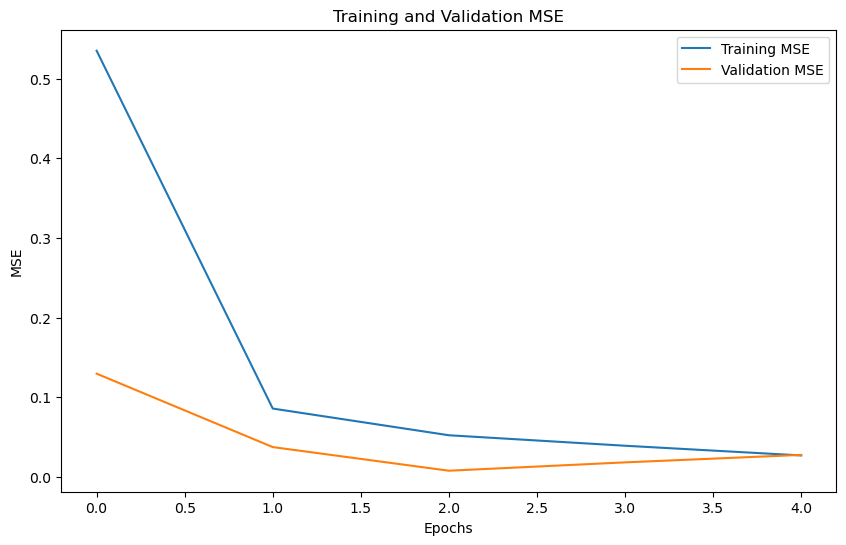

31/31 [==============================] - 1s 12ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_4_1/hyperparameter_random_tuning_fold_tf_4_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x3966c0d50>


Epoch 1/5
31/31 [==============================] - 2s 12ms/step - loss: 0.0326 - mean_absolute_error: 0.1304 - mean_squared_error: 0.0326 - val_loss: 0.0036 - val_mean_absolute_error: 0.0495 - val_mean_squared_error: 0.0036
Epoch 2/5
31/31 [==============================] - 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0096 - val_loss: 0.0015 - val_mean_absolute_error: 0.0279 - val_mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0650 - mean_squared_error: 0.0073 - val_loss: 0.0029 - val_mean_absolute_error: 0.0344 - val_mean_squared_error: 0.0029
Epoch 4/5
31/31 [==============================] - 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0562 - mean_squared_error: 0.0055 - val_loss: 0.0014 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0554

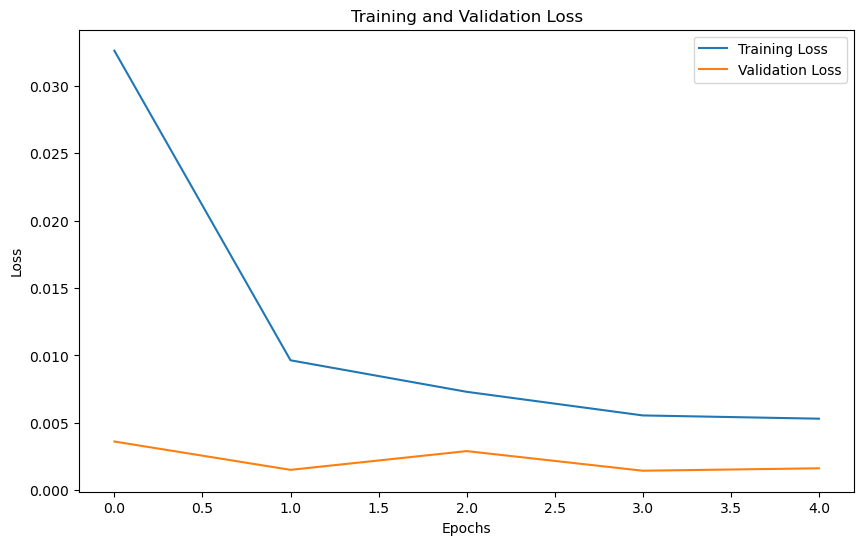

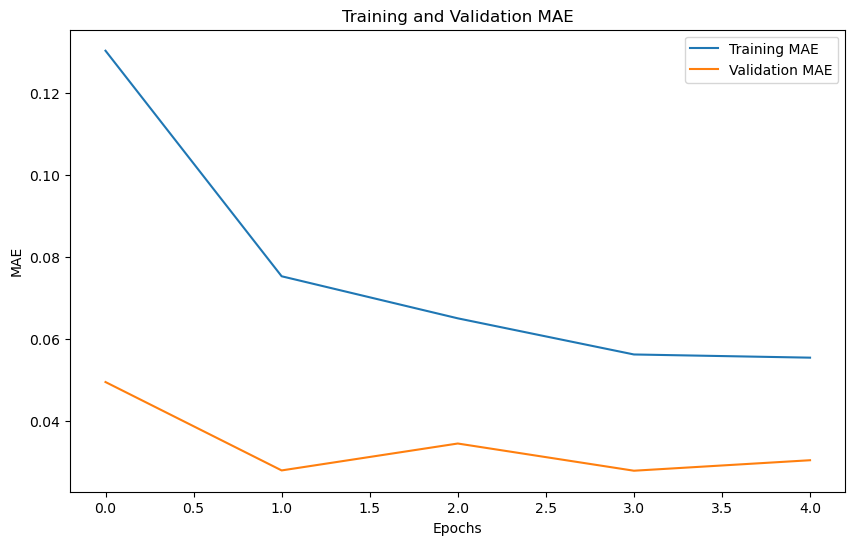

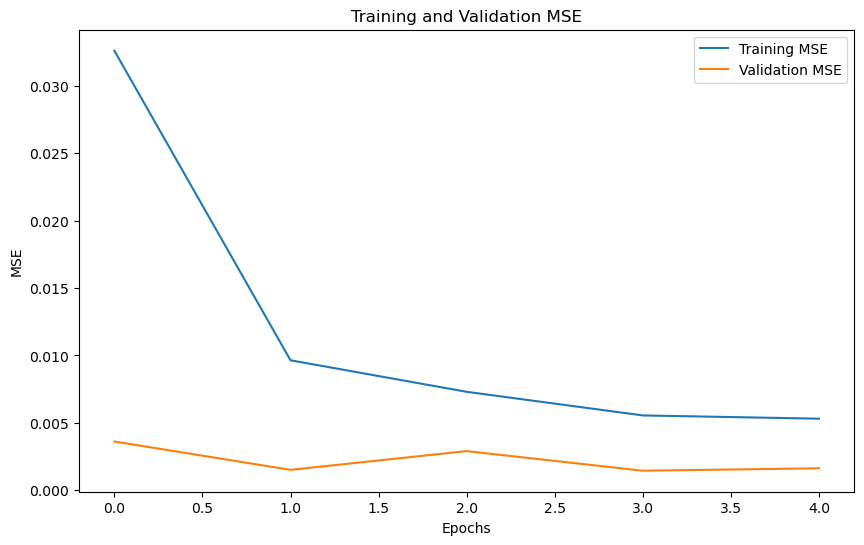

16/16 [==============================] - 0s 9ms/step


In [122]:
# for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
#     X_train_outer, X_test_outer = X[train_ix], X[test_ix]
#     y_train_outer, y_test_outer = y[train_ix], y[test_ix]

#     inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

#     for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
#         X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
#         y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

#         tuner = kt.RandomSearch(
#             build_model,
#             objective='val_loss',
#             max_trials=3,
#             directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
#             project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
#         )

#         tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

#         best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
#         print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

#         model = build_model(best_hps)
#         es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

#         model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)

#         y_pred = model.predict(X_val)
#         mae = mean_squared_error(y_val, y_pred)

#         if mae < best_model_mae:
#             best_model_mae = mae
#             best_model_hyperparameters = best_hps
#             best_model = model

#         if mae > worst_model_mae:
#             worst_model_mae = mae
#             worst_model_hyperparameters = best_hps
#             worst_model = model

#     start_time = time.time()
#     y_pred_best = best_model.predict(X_test_outer)
#     y_pred_worst = worst_model.predict(X_test_outer)
#     end_time = time.time()

#     mse_best = mean_squared_error(y_test_outer, y_pred_best)
#     mae_best = mean_absolute_error(y_test_outer, y_pred_best)
#     rmse_best = np.sqrt(mse_best)
#     r2_best = r2_score(y_test_outer, y_pred_best)
#     time_duration = end_time - start_time

#     mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
#     mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
#     rmse_worst = np.sqrt(mse_worst)
#     r2_worst = r2_score(y_test_outer, y_pred_worst)

#     nested_scores.append({
#         "Best Model": {
#             "MSE": mse_best,
#             "R^2": r2_best,
#             "RMSE": rmse_best,
#             "MAE": mae_best,
#             "testing time": time_duration
#         },
#         "Worst Model": {
#             "MSE": mse_worst,
#             "R^2": r2_worst,
#             "RMSE": rmse_worst,
#             "MAE": mae_worst
#         }
#     })

for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_ix], X[test_ix]
    y_train_outer, y_test_outer = y[train_ix], y[test_ix]

    inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

    for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
        X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
        y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

        tuner = kt.RandomSearch(
            build_tft_model,
            objective='val_loss',
            max_trials=3,
            directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
            project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
        )

        tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

        best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
        print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

        model = build_tft_model(best_hps)
        es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

        history=model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)
# Plotting training history
        plot_loss(history)
        plot_mae(history)
        plot_mse(history)

        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)

        if mae < best_model_mae:
            best_model_mae = mae
            best_model_hyperparameters = best_hps
            best_model = model

        if mae > worst_model_mae:
            worst_model_mae = mae
            worst_model_hyperparameters = best_hps
            worst_model = model

    start_time = time.time()
    y_pred_best = best_model.predict(X_test_outer)
    y_pred_worst = worst_model.predict(X_test_outer)
    end_time = time.time()

    mse_best = mean_squared_error(y_test_outer, y_pred_best)
    mae_best = mean_absolute_error(y_test_outer, y_pred_best)
    rmse_best = np.sqrt(mse_best)
    r2_best = r2_score(y_test_outer, y_pred_best)
    time_duration = end_time - start_time

    mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
    mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
    rmse_worst = np.sqrt(mse_worst)
    r2_worst = r2_score(y_test_outer, y_pred_worst)

    nested_scores.append({
        "Best Model": {
            "MSE": mse_best,
            "R^2": r2_best,
            "RMSE": rmse_best,
            "MAE": mae_best,
            "testing time": time_duration
        },
        "Worst Model": {
            "MSE": mse_worst,
            "R^2": r2_worst,
            "RMSE": rmse_worst,
            "MAE": mae_worst
        }
    })




# for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
#     X_train_outer, X_test_outer = X[train_ix], X[test_ix]
#     y_train_outer, y_test_outer = y[train_ix], y[test_ix]

#     inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

#     for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
#         X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
#         y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

#         tuner = kt.RandomSearch(
#             build_model,
#             objective='val_loss',
#             max_trials=3,
#             directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
#             project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
#         )

#         tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

#         best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
#         print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

#         model = build_model(best_hps)
#         es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

#         history = model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)

#         # Plotting training history
#         plot_loss(history)
#         plot_mae(history)
#         plot_mse(history)

#         y_pred = model.predict(X_val)
#         mae = mean_squared_error(y_val, y_pred)

#         if mae < best_model_mae:
#             best_model_mae = mae
#             best_model_hyperparameters = best_hps
#             best_model = model

#         if mae > worst_model_mae:
#             worst_model_mae = mae
#             worst_model_hyperparameters = best_hps
#             worst_model = model

#     start_time = time.time()
#     y_pred_best = best_model.predict(X_test_outer)
#     y_pred_worst = worst_model.predict(X_test_outer)
#     end_time = time.time()

#     mse_best = mean_squared_error(y_test_outer, y_pred_best)
#     mae_best = mean_absolute_error(y_test_outer, y_pred_best)
#     rmse_best = np.sqrt(mse_best)
#     r2_best = r2_score(y_test_outer, y_pred_best)
#     time_duration = end_time - start_time

#     mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
#     mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
#     rmse_worst = np.sqrt(mse_worst)
#     r2_worst = r2_score(y_test_outer, y_pred_worst)

#     nested_scores.append({
#         "Best Model": {
#             "MSE": mse_best,
#             "R^2": r2_best,
#             "RMSE": rmse_best,
#             "MAE": mae_best,
#             "testing time": time_duration
#         },
#         "Worst Model": {
#             "MSE": mse_worst,
#             "R^2": r2_worst,
#             "RMSE": rmse_worst,
#             "MAE": mae_worst
#         }
#     })


In [124]:
print("Nested CV scores:", nested_scores)

Nested CV scores: [{'Best Model': {'MSE': 0.00713157049205004, 'R^2': 0.8342819409216395, 'RMSE': 0.08444862634791664, 'MAE': 0.07029809141007139, 'testing time': 0.39240479469299316}, 'Worst Model': {'MSE': 0.03648436002327126, 'R^2': 0.15220394490770517, 'RMSE': 0.1910087956699148, 'MAE': 0.1808349993431709}}, {'Best Model': {'MSE': 0.001479535025899443, 'R^2': 0.9648321814543825, 'RMSE': 0.0384647244355064, 'MAE': 0.028258480394364818, 'testing time': 0.3001120090484619}, 'Worst Model': {'MSE': 0.036366770842181255, 'R^2': 0.13557977629465923, 'RMSE': 0.1907007363440982, 'MAE': 0.18064240520123842}}, {'Best Model': {'MSE': 0.0013322695059436054, 'R^2': 0.9702315219335885, 'RMSE': 0.03650026720372887, 'MAE': 0.02734515059165383, 'testing time': 0.2654280662536621}, 'Worst Model': {'MSE': 0.03760407016035421, 'R^2': 0.15976765002704507, 'RMSE': 0.19391768913730953, 'MAE': 0.18368961397350672}}, {'Best Model': {'MSE': 0.0014353778073254713, 'R^2': 0.9651590441054249, 'RMSE': 0.03788638

In [126]:
print("Nested Cross-Validation Scores:")
for idx, score in enumerate(nested_scores):
    print(f"Fold {idx+1}:")
    print(f"  Best Model - MSE: {score['Best Model']['MSE']}, R^2: {score['Best Model']['R^2']}, RMSE: {score['Best Model']['RMSE']}, MAE: {score['Best Model']['MAE']}, Testing Time: {score['Best Model']['testing time']}")
    print(f"  Worst Model - MSE: {score['Worst Model']['MSE']}, R^2: {score['Worst Model']['R^2']}, RMSE: {score['Worst Model']['RMSE']}, MAE: {score['Worst Model']['MAE']}")


Nested Cross-Validation Scores:
Fold 1:
  Best Model - MSE: 0.00713157049205004, R^2: 0.8342819409216395, RMSE: 0.08444862634791664, MAE: 0.07029809141007139, Testing Time: 0.39240479469299316
  Worst Model - MSE: 0.03648436002327126, R^2: 0.15220394490770517, RMSE: 0.1910087956699148, MAE: 0.1808349993431709
Fold 2:
  Best Model - MSE: 0.001479535025899443, R^2: 0.9648321814543825, RMSE: 0.0384647244355064, MAE: 0.028258480394364818, Testing Time: 0.3001120090484619
  Worst Model - MSE: 0.036366770842181255, R^2: 0.13557977629465923, RMSE: 0.1907007363440982, MAE: 0.18064240520123842
Fold 3:
  Best Model - MSE: 0.0013322695059436054, R^2: 0.9702315219335885, RMSE: 0.03650026720372887, MAE: 0.02734515059165383, Testing Time: 0.2654280662536621
  Worst Model - MSE: 0.03760407016035421, R^2: 0.15976765002704507, RMSE: 0.19391768913730953, MAE: 0.18368961397350672
Fold 4:
  Best Model - MSE: 0.0014353778073254713, R^2: 0.9651590441054249, RMSE: 0.037886380235191, MAE: 0.02837505357183952,

78/78 [==============================] - 0s 2ms/step


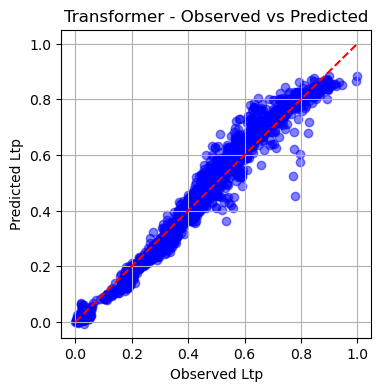

In [128]:

import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_model.predict(X).flatten()
y_observed = y.flatten()

# Plotting
plt.figure(figsize=(4,4))
plt.scatter(y_observed, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_observed), max(y_observed)], [min(y_observed), max(y_observed)], color='red', linestyle='--')
plt.title('Transformer - Observed vs Predicted')
plt.xlabel('Observed Ltp')
plt.ylabel('Predicted Ltp')
plt.grid(True)
plt.show()

In [130]:
# Assuming best_model is your trained model
optimizer = best_model.optimizer
learning_rate = float(optimizer.learning_rate.numpy())

# Print the optimizer and learning rate
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", learning_rate)

Optimizer: Adam
Learning Rate: 0.004089023917913437


In [132]:
# Function to extract dropout rate from a layer
def get_dropout_rate(layer):
    if hasattr(layer, 'rate'):
        return layer.rate
    elif hasattr(layer, 'dropout'):
        return layer.dropout
    else:
        return None

# Iterate through layers of the model and find the dropout rates
dropout_rates = []

for layer in best_model.layers:
    rate = get_dropout_rate(layer)
    if rate is not None:
        dropout_rates.append((layer.name, rate))

# Print the dropout rates
print("Dropout Rates:")
for layer_name, rate in dropout_rates:
    print(f"{layer_name}: {rate}")


Dropout Rates:
dropout_81: 0.14157905544443947
dropout_82: 0.14157905544443947
dropout_83: 0.31536493171621927
dropout_84: 0.31536493171621927
dropout_85: 0.5441204819872223
dropout_86: 0.5441204819872223
dropout_87: 0.15309876617873266
dropout_88: 0.15309876617873266
dropout_89: 0.2705034131987628
dropout_90: 0.2705034131987628
dropout_91: 0.5684304462055615
dropout_92: 0.5684304462055615
dropout_93: 0.29094893487838025


In [134]:
best_hyperparameters_dict = best_model_hyperparameters.values
worst_hyperparameters_dict = worst_model_hyperparameters.values

print("Best Hyperparameters:", best_hyperparameters_dict)
print("Worst Hyperparameters:", worst_hyperparameters_dict)

Best Hyperparameters: {'num_transformer_blocks': 6, 'head_size': 8, 'num_heads': 2, 'ff_dim': 45, 'dropout_0': 0.14157905544443947, 'dropout_1': 0.31536493171621927, 'num_mlp_layers': 1, 'mlp_units_0': 128, 'mlp_dropout_0': 0.29094893487838025, 'optimizer': 'adam', 'learning_rate': 0.004089023708836388, 'dropout_2': 0.5441204819872223, 'dropout_3': 0.15309876617873266, 'dropout_4': 0.2705034131987628, 'dropout_5': 0.5684304462055615, 'mlp_units_1': 224, 'mlp_dropout_1': 0.5276796636482048, 'mlp_units_2': 224, 'mlp_dropout_2': 0.35109190875869734}
Worst Hyperparameters: {'num_transformer_blocks': 4, 'head_size': 200, 'num_heads': 16, 'ff_dim': 40, 'dropout_0': 0.34817327518082863, 'dropout_1': 0.4989820098324942, 'num_mlp_layers': 1, 'mlp_units_0': 96, 'mlp_dropout_0': 0.1836629056852904, 'optimizer': 'adam', 'learning_rate': 0.0008258280724621984, 'dropout_2': 0.5243451913683366, 'dropout_3': 0.126781961593343, 'mlp_units_1': 224, 'mlp_dropout_1': 0.2734952923235773, 'mlp_units_2': 32,

In [136]:
# Assuming best_model is your final trained model
best_model.save('./STOCK_best_model_transformer.h5')

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


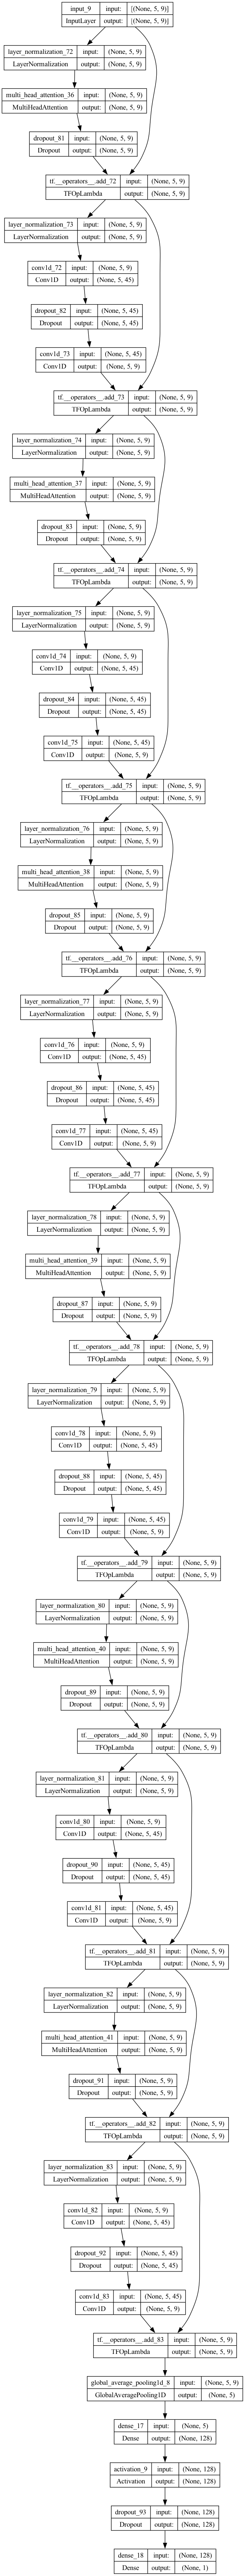

In [138]:
from keras.utils import plot_model

# Visualize the model architecture and save the diagram to a file
plot_model(best_model, to_file='tf_model.png', show_shapes=True, show_layer_names=True)
